In [23]:
import numpy as np
import pandas as pd
from tensorflow import keras
import os
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [7]:
pwd = os.getcwd()

In [8]:
train_import = pd.read_csv(pwd + "/train.csv")
train_import

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,06/25/2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,...,3.0,0,0,0,0,0,0,0,0,5787594.0
133,133,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,9262754.0
134,134,07/08/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,2544857.0
135,135,10/29/2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,7217634.0


In [25]:
x_train = np.array(train_import.iloc[:, 5:-1])
x_train

array([[4., 5., 4., ..., 4., 3., 4.],
       [4., 5., 4., ..., 0., 0., 0.],
       [2., 4., 2., ..., 0., 0., 0.],
       ...,
       [3., 4., 4., ..., 0., 0., 0.],
       [4., 5., 4., ..., 0., 0., 0.],
       [4., 5., 3., ..., 0., 0., 0.]])

In [26]:
y_train = np.array(train_import["revenue"])
y_train

array([ 5653753.,  6923131.,  2055379.,  2675511.,  4316715.,  5017319.,
        5166635.,  4491607.,  4952497.,  5444227.,  3745135.,  5161370.,
        1734634.,  4807746.,  1999097.,  3218918., 19696939.,  8213524.,
        5337526.,  2021934.,  5525735.,  1149870.,  3956086.,  2999068.,
        8904084.,  3778621.,  2267425.,  5435276.,  4705945.,  3447890.,
        3008199.,  2058644.,  3261924.,  2371202.,  4100886.,  3903884.,
        3028267.,  2740687.,  5461700.,  3818055.,  6836483.,  4554237.,
        4952255.,  2732645.,  4264176.,  3752885.,  4250758.,  7865428.,
        7201784.,  8630682.,  2156098.,  3273041.,  1763231.,  5595267.,
        4651866.,  6941173.,  2390534.,  3258837.,  3004429.,  3600467.,
        3164972.,  4350573.,  5286212.,  1619683.,  2551252.,  1756069.,
        1882131.,  4052733.,  3836721.,  3452382.,  3982767.,  4136425.,
        2525375.,  3347767.,  5500818., 16549064.,  4590423.,  1904842.,
        3871344.,  6313221.,  3727364.,  4066618., 

In [27]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_train,y_train,test_size=0.2,random_state=42)

In [35]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()

x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [34]:
# There's no revenue data here so I can't really use it with my models, just for entry into the contest

# test_import = pd.read_csv(pwd + "/test.csv")
# test_import

In [10]:
test_data = test_import.copy()
train_data = train_import.copy()

In [18]:
x_test = np.array(test_data.iloc[:, 5:])
x_test

array([[ 1. ,  4. ,  4. , ...,  0. ,  0. ,  0. ],
       [ 3. ,  4. ,  4. , ...,  0. ,  0. ,  0. ],
       [ 3. ,  4. ,  4. , ...,  0. ,  0. ,  0. ],
       ...,
       [ 4. ,  5. ,  4. , ...,  4. ,  4. ,  2. ],
       [12. ,  7.5,  6. , ...,  0. ,  0. ,  0. ],
       [ 2. ,  5. ,  4. , ...,  4. ,  2. ,  0. ]])

In [19]:
x_train = np.array(train_data.iloc[:, 5:-1])
x_train

array([[4., 5., 4., ..., 4., 3., 4.],
       [4., 5., 4., ..., 0., 0., 0.],
       [2., 4., 2., ..., 0., 0., 0.],
       ...,
       [3., 4., 4., ..., 0., 0., 0.],
       [4., 5., 4., ..., 0., 0., 0.],
       [4., 5., 3., ..., 0., 0., 0.]])

In [13]:
y_train = np.array(train_data["revenue"])
y_train

array([ 5653753.,  6923131.,  2055379.,  2675511.,  4316715.,  5017319.,
        5166635.,  4491607.,  4952497.,  5444227.,  3745135.,  5161370.,
        1734634.,  4807746.,  1999097.,  3218918., 19696939.,  8213524.,
        5337526.,  2021934.,  5525735.,  1149870.,  3956086.,  2999068.,
        8904084.,  3778621.,  2267425.,  5435276.,  4705945.,  3447890.,
        3008199.,  2058644.,  3261924.,  2371202.,  4100886.,  3903884.,
        3028267.,  2740687.,  5461700.,  3818055.,  6836483.,  4554237.,
        4952255.,  2732645.,  4264176.,  3752885.,  4250758.,  7865428.,
        7201784.,  8630682.,  2156098.,  3273041.,  1763231.,  5595267.,
        4651866.,  6941173.,  2390534.,  3258837.,  3004429.,  3600467.,
        3164972.,  4350573.,  5286212.,  1619683.,  2551252.,  1756069.,
        1882131.,  4052733.,  3836721.,  3452382.,  3982767.,  4136425.,
        2525375.,  3347767.,  5500818., 16549064.,  4590423.,  1904842.,
        3871344.,  6313221.,  3727364.,  4066618., 

Receiving a "direct kernel connection broken" error here

In [7]:
model = keras.models.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=64)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(x_train, y_train, epochs=100)

Train on 137 samples
Epoch 1/100


In [7]:
rooms = np.array(range(1, 11))
price = np.array(range(100, 600, 50))

model = keras.models.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=64) 
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(rooms, price, epochs=100)

print(model.predict([7.0]))

Train on 10 samples
Epoch 1/100


# Multiple Linear Regression

In [36]:
# # Scaling values
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder

# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), (0, 1, 2))], remainder='passthrough')
# X = np.array(ct.fit_transform(x_train))
# X

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [38]:
y_pred = regressor.predict(x_test)
y_pred

array([ 2480433.55, -2676811.92,  1974982.26,  5085938.51,  4797791.87,
        4034271.49,  7476796.34,  1834625.38,  4885354.53,  4631910.08,
        1218920.96,  -320206.43,  3706689.01,  7069159.62,  1502641.59,
        3083970.4 ,  4548768.2 ,  4147395.18,  3552766.81,  4073549.57,
       -6033368.5 ,  2465801.73,  4824766.74,  3218442.01,  3994736.93,
        5066134.53,  4388800.31,  3697780.8 ])

In [39]:
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), axis=1))

[[ 2480433.55  2792031.  ]
 [-2676811.92  4467728.  ]
 [ 1974982.26  1734634.  ]
 [ 5085938.51  2267425.  ]
 [ 4797791.87  4263629.  ]
 [ 4034271.49  1882131.  ]
 [ 7476796.34  2551252.  ]
 [ 1834625.38  4882985.  ]
 [ 4885354.53  9262754.  ]
 [ 4631910.08  7495092.  ]
 [ 1218920.96  4250553.  ]
 [ -320206.43  3752885.  ]
 [ 3706689.01  3452382.  ]
 [ 7069159.62  4052733.  ]
 [ 1502641.59  2058644.  ]
 [ 3083970.4   4952255.  ]
 [ 4548768.2   5435276.  ]
 [ 4147395.18  2021934.  ]
 [ 3552766.81  5787594.  ]
 [ 4073549.57  2390534.  ]
 [-6033368.5   4780607.  ]
 [ 2465801.73  4316715.  ]
 [ 4824766.74  4219263.  ]
 [ 3218442.01  3028267.  ]
 [ 3994736.93  2364478.  ]
 [ 5066134.53  9652350.  ]
 [ 4388800.31 19696939.  ]
 [ 3697780.8   5337526.  ]]


# Support Vector Machines

In [62]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(x_train, y_train)

SVR()

In [63]:
y_pred = regressor.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), axis=1))

[[ 3871336.15  2792031.  ]
 [ 3871345.3   4467728.  ]
 [ 3871335.6   1734634.  ]
 [ 3871345.26  2267425.  ]
 [ 3871335.77  4263629.  ]
 [ 3871335.99  1882131.  ]
 [ 3871344.37  2551252.  ]
 [ 3871344.17  4882985.  ]
 [ 3871337.63  9262754.  ]
 [ 3871337.51  7495092.  ]
 [ 3871345.41  4250553.  ]
 [ 3871345.54  3752885.  ]
 [ 3871335.97  3452382.  ]
 [ 3871341.41  4052733.  ]
 [ 3871345.48  2058644.  ]
 [ 3871345.87  4952255.  ]
 [ 3871341.91  5435276.  ]
 [ 3871336.    2021934.  ]
 [ 3871335.96  5787594.  ]
 [ 3871338.32  2390534.  ]
 [ 3871343.84  4780607.  ]
 [ 3871343.86  4316715.  ]
 [ 3871337.29  4219263.  ]
 [ 3871340.64  3028267.  ]
 [ 3871342.09  2364478.  ]
 [ 3871338.71  9652350.  ]
 [ 3871337.55 19696939.  ]
 [ 3871347.38  5337526.  ]]


In [64]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

3607695.1901047085

In [42]:
y_pred

array([[-1.73, -4.16, -3.45, ..., -0.79, -0.7 , -1.01],
       [-1.38, -2.76, -4.34, ..., -0.4 , -0.5 , -0.35],
       [-1.62, -4.16, -4.34, ..., -0.79, -0.7 , -1.01],
       ...,
       [-1.5 , -2.76, -4.34, ..., -0.79, -0.7 , -1.01],
       [-1.5 , -2.76, -4.34, ..., -0.79, -0.7 , -1.01],
       [-1.38, -2.76, -4.34, ..., -0.4 , -0.5 , -0.35]])

# XGBoost

In [91]:
import xgboost as xgb

In [92]:
# Convert the dataset into an optimized data structure called Dmatrix that XGBoost supports and gives it acclaimed performance and efficiency gains.

data_dmatrix = xgb.DMatrix(data=x_train, label=y_train)

In [93]:
xg_reg = xgb.XGBRegressor(objective='reg:linear', colsample_bytree=0.3, learning_rate=0.1, max_depth = 5, alpha=10, n_estimators=37)
xg_reg.fit(x_train, y_train)

[22:24:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=37, n_jobs=12, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=10, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [94]:
y_pred = xg_reg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

3397373.678355542

In [95]:
differences = [i - j for i in y_pred for j in y_test]
evaluation_values = list(zip(y_pred,y_test, differences))

pd.DataFrame(data=evaluation_values, columns=["Predicted", "Actual", "Difference"])

,Predicted,Actual,Difference
0,2396398.75,2792031.0,-395632.25
1,4310062.50,4467728.0,-2071329.25
2,3028950.75,1734634.0,661764.75
3,4402993.00,2267425.0,128973.75
4,3269804.50,4263629.0,-1867230.25
5,2949179.50,1882131.0,514267.75
6,3877983.50,2551252.0,-154853.25
7,3740843.50,4882985.0,-2486586.25
8,5836961.50,9262754.0,-6866355.25
9,4540477.00,7495092.0,-5098693.25


# XGBoost: Determining the Best Predictor

In [96]:
data_columns = list(train_data.columns[5: -1])
data_columns

['P1',
 'P2',
 'P3',
 'P4',
 'P5',
 'P6',
 'P7',
 'P8',
 'P9',
 'P10',
 'P11',
 'P12',
 'P13',
 'P14',
 'P15',
 'P16',
 'P17',
 'P18',
 'P19',
 'P20',
 'P21',
 'P22',
 'P23',
 'P24',
 'P25',
 'P26',
 'P27',
 'P28',
 'P29',
 'P30',
 'P31',
 'P32',
 'P33',
 'P34',
 'P35',
 'P36',
 'P37']

In [110]:
rmse_values = []

xg_reg = xgb.XGBRegressor(objective='reg:linear', colsample_bytree=0.3, learning_rate=0.1, max_depth = 5, alpha=10, n_estimators=10)

for i in data_columns:
    x_train_shrunk = np.array([[x] for x in x_train[:, data_columns.index(i)]])
    x_test_shrunk = np.array(np.array([[x] for x in x_test[:, data_columns.index(i)]]))
    xg_reg.fit(x_train_shrunk, y_train)
    y_pred = xg_reg.predict(x_test_shrunk)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    rmse_values.append(rmse)

list(zip(data_columns, rmse_values))

[22:29:35] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[22:29:35] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[22:29:35] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[22:29:35] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[22:29:35] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[22:29:35] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/objective/regression_obj

[('P1', 4055429.5598395076),
 ('P2', 3902955.1874582013),
 ('P3', 3988268.554669144),
 ('P4', 3997695.299494247),
 ('P5', 3987322.6667521233),
 ('P6', 3962508.169753699),
 ('P7', 3991173.1431297534),
 ('P8', 3979728.282420966),
 ('P9', 3993454.9892118177),
 ('P10', 3940302.98273921),
 ('P11', 3970171.0337823248),
 ('P12', 4091517.5480089905),
 ('P13', 3937221.211140536),
 ('P14', 4069553.893310859),
 ('P15', 4011910.8906503166),
 ('P16', 4035851.878988354),
 ('P17', 4050546.4354938306),
 ('P18', 4040869.923313019),
 ('P19', 4084850.218645744),
 ('P20', 3945643.9584370037),
 ('P21', 4008773.077968041),
 ('P22', 4003420.9105809764),
 ('P23', 4037171.7264988944),
 ('P24', 4020063.665000636),
 ('P25', 4030530.705422222),
 ('P26', 4028384.287320061),
 ('P27', 3990357.757425615),
 ('P28', 4009201.4519840353),
 ('P29', 4024007.422628658),
 ('P30', 4027848.396975335),
 ('P31', 4015067.7634051),
 ('P32', 4036956.789382087),
 ('P33', 3993118.3408750035),
 ('P34', 4024281.2036644714),
 ('P35', 40

## None of the above seem like particularly good predictors so let's try and remove outliers based on revenue

In [112]:
train_import.sort_values(by="revenue", ascending=False)

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
16,16,01/07/2000,İstanbul,Big Cities,FC,3,5.0,4.0,4.0,2,...,2.0,0,0,0,0,0,0,0,0,19696939.0
75,75,10/15/2005,İstanbul,Big Cities,FC,5,5.0,4.0,5.0,1,...,0.0,0,0,0,0,0,0,0,0,16549064.0
99,99,12/18/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,1.0,5,5,4,2,5,5,5,3,13575224.0
100,100,09/21/2007,İstanbul,Big Cities,FC,3,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,9652350.0
133,133,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,9262754.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,65,12/21/2013,İzmir,Big Cities,FC,3,5.0,4.0,3.0,1,...,3.0,0,0,0,0,0,0,0,0,1756069.0
12,12,02/28/2013,Ankara,Big Cities,IL,2,2.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,1734634.0
63,63,08/05/2013,Kırklareli,Other,FC,2,2.0,4.0,4.0,3,...,3.0,0,0,0,0,0,0,0,0,1619683.0
95,95,06/08/2012,Samsun,Other,FC,2,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,1270499.0


In [113]:
import seaborn as sns

<AxesSubplot:xlabel='revenue', ylabel='Density'>

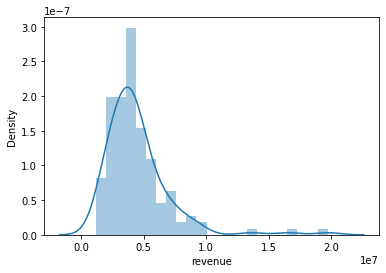

In [116]:
# It seems that revenue above 1M is an outlier

sns.distplot(train_import["revenue"])

In [120]:
train_no_outliers = train_import[train_import["revenue"] < 10000000]

In [122]:
x_train_new = np.array(train_no_outliers.iloc[:, 5:-1])
y_train_new = np.array(train_no_outliers["revenue"])

from sklearn.model_selection import train_test_split

x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x_train_new,y_train_new,test_size=0.2,random_state=42)

In [123]:
rmse_values = []

xg_reg = xgb.XGBRegressor(objective='reg:linear', colsample_bytree=0.3, learning_rate=0.1, max_depth = 5, alpha=10, n_estimators=10)

for i in data_columns:
    x_train_shrunk = np.array([[x] for x in x_train_new[:, data_columns.index(i)]])
    x_test_shrunk = np.array(np.array([[x] for x in x_test_new[:, data_columns.index(i)]]))
    xg_reg.fit(x_train_shrunk, y_train_new)
    y_pred = xg_reg.predict(x_test_shrunk)
    rmse = np.sqrt(mean_squared_error(y_test_new, y_pred))

    rmse_values.append(rmse)

list(zip(data_columns, rmse_values))

[22:45:27] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[22:45:27] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[22:45:27] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[22:45:27] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[22:45:27] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[22:45:27] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/objective/regression_obj

[('P1', 2573576.4779502284),
 ('P2', 2469006.7580825426),
 ('P3', 2572218.582702365),
 ('P4', 2572218.582702365),
 ('P5', 2566830.7386410465),
 ('P6', 2539486.648022379),
 ('P7', 2524230.009706339),
 ('P8', 2576448.8801901303),
 ('P9', 2572218.582702365),
 ('P10', 2572218.582702365),
 ('P11', 2572218.582702365),
 ('P12', 2580505.1488624495),
 ('P13', 2572218.582702365),
 ('P14', 2609203.2916998086),
 ('P15', 2576913.459307041),
 ('P16', 2557791.2469218117),
 ('P17', 2542066.5838065282),
 ('P18', 2556501.101470461),
 ('P19', 2583813.336446157),
 ('P20', 2597733.402289234),
 ('P21', 2545938.321487837),
 ('P22', 2570048.106071825),
 ('P23', 2541111.3158726855),
 ('P24', 2611846.4143656166),
 ('P25', 2565485.4494763585),
 ('P26', 2567783.091277997),
 ('P27', 2572218.582702365),
 ('P28', 2644087.4334534784),
 ('P29', 2603096.889532303),
 ('P30', 2570939.5541909025),
 ('P31', 2565080.1334650773),
 ('P32', 2565712.4789998108),
 ('P33', 2569281.694265069),
 ('P34', 2569688.8287443356),
 ('P35'